In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import ipysheet as ips
import panel as pn
from scipy import stats 
pn.extension('katex') 

# Tutorial 8 #



 <br><br>



## Tutorial problems on sorption and degradation ##


## Homework problems on sorption and degradation





In [2]:
#Tutorial Problems
r4_1 = pn.pane.Markdown("""
# Tutorial Problems on Sorption and Degradation #

""",width = 900, style={'font-size': '13pt'}) 

r4_1

Markdown(str, style={'font-size': '13pt'}, width=900)

In [22]:
#Tutorial Problem 24
r5_1 = pn.pane.LaTeX(r"""

Tutorial Problem 24 
<br><br>

A series of batch experiments were performed to quantify adsorption of Cr(VI) at bed soil of River Elbe 
(solid density $\rho$ = 2.7 g/cm³, effective porosity $n_e = 30 \%$). For each experiment 10 g of bed soil was 
equilibrated in 25 mL of water with initial Cr(VI) concentrations $C$ ranging from 50 to 250 mg/L (see table).
""",width = 600, style={'font-size': '13pt'})

r5_2 = pn.pane.LaTeX(r"""
a) Calculate the mass ratio $C_a$ of adsorbate vs. adsorbent for each batch experiment by employing the mass budget:

$$V_w \cdot C_0 = V_w \cdot C_{eq} + M_s\cdot C_a$$

with $V_w$ = water volume, $M_s$ = solid mass.<br>
<br>

b) Determine the distribution coefficient $K_d$ graphically by assuming that sorption of Cr(VI) can be described by a linear isotherm.
<br>
c) What is the retardation factor of Cr(VI) migrating through River Elbe bed soil? Briefly interpret your result.

""",width = 600, style={'font-size': '13pt'})

r5_3 = pn.pane.LaTeX(r"""

$$C_a = \frac{V_w \cdot (C_0 - C_{eq})}{M_s}$$

""", style={'font-size': '13pt'})

d24_Co = np.array([50, 75, 100, 150, 200, 250])
d24_Ceq =  np.array([15, 28, 40, 61, 82, 104])

d24 = {"Co [mg/L]":d16_Co, "Ceq [mg/L]":d24_Ceq}

df24 = pd.DataFrame(d16)

spacer = pn.Spacer(width=50)

r5_4= pn.Column(r5_1, r5_2 )
r5_5= pn.Column(df24, r5_3 )
pn.Row(r5_4, spacer, r5_5)


Row
    [0] Column
        [0] LaTeX(str, style={'font-size': '13pt'}, width=600)
        [1] LaTeX(str, style={'font-size': '13pt'}, width=600)
    [1] Spacer(width=50)
    [2] Column
        [0] DataFrame(DataFrame, classes=['panel-df'])
        [1] LaTeX(str, style={'font-size': '13pt'})

In [23]:
# Solution of Problem 24 a

r5_6 = pn.pane.Markdown("""
## Solution Problem 24 a.
(**Check Lecture 09, Slides 11--13 for more information**)

""",width = 600, style={'font-size': '13pt'})

#Given
Vw = 25/1000 # L, volume of water in L
Ms = 10 # g, mass of Cr(IV)

# calculation
d24_Ca = Vw/Ms*(d24_Co-d24_Ceq) # Ca  = Vw/Ms* (Co-Ceq)

#output
d24_a = {"Co [mg/L]":d24_Co, "Ceq [mg/L]":d24_Ceq, "Ca [mg/g]":d24_Ca}
df24_a = pd.DataFrame(d16_a)
pn.Column(r5_6, df24_a) 

Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=600)
    [1] DataFrame(DataFrame, classes=['panel-df'])

Row
    [0] Markdown(str, style={'font-size': '13pt'}, width=400)
    [1] Matplotlib(Figure, dpi=300)
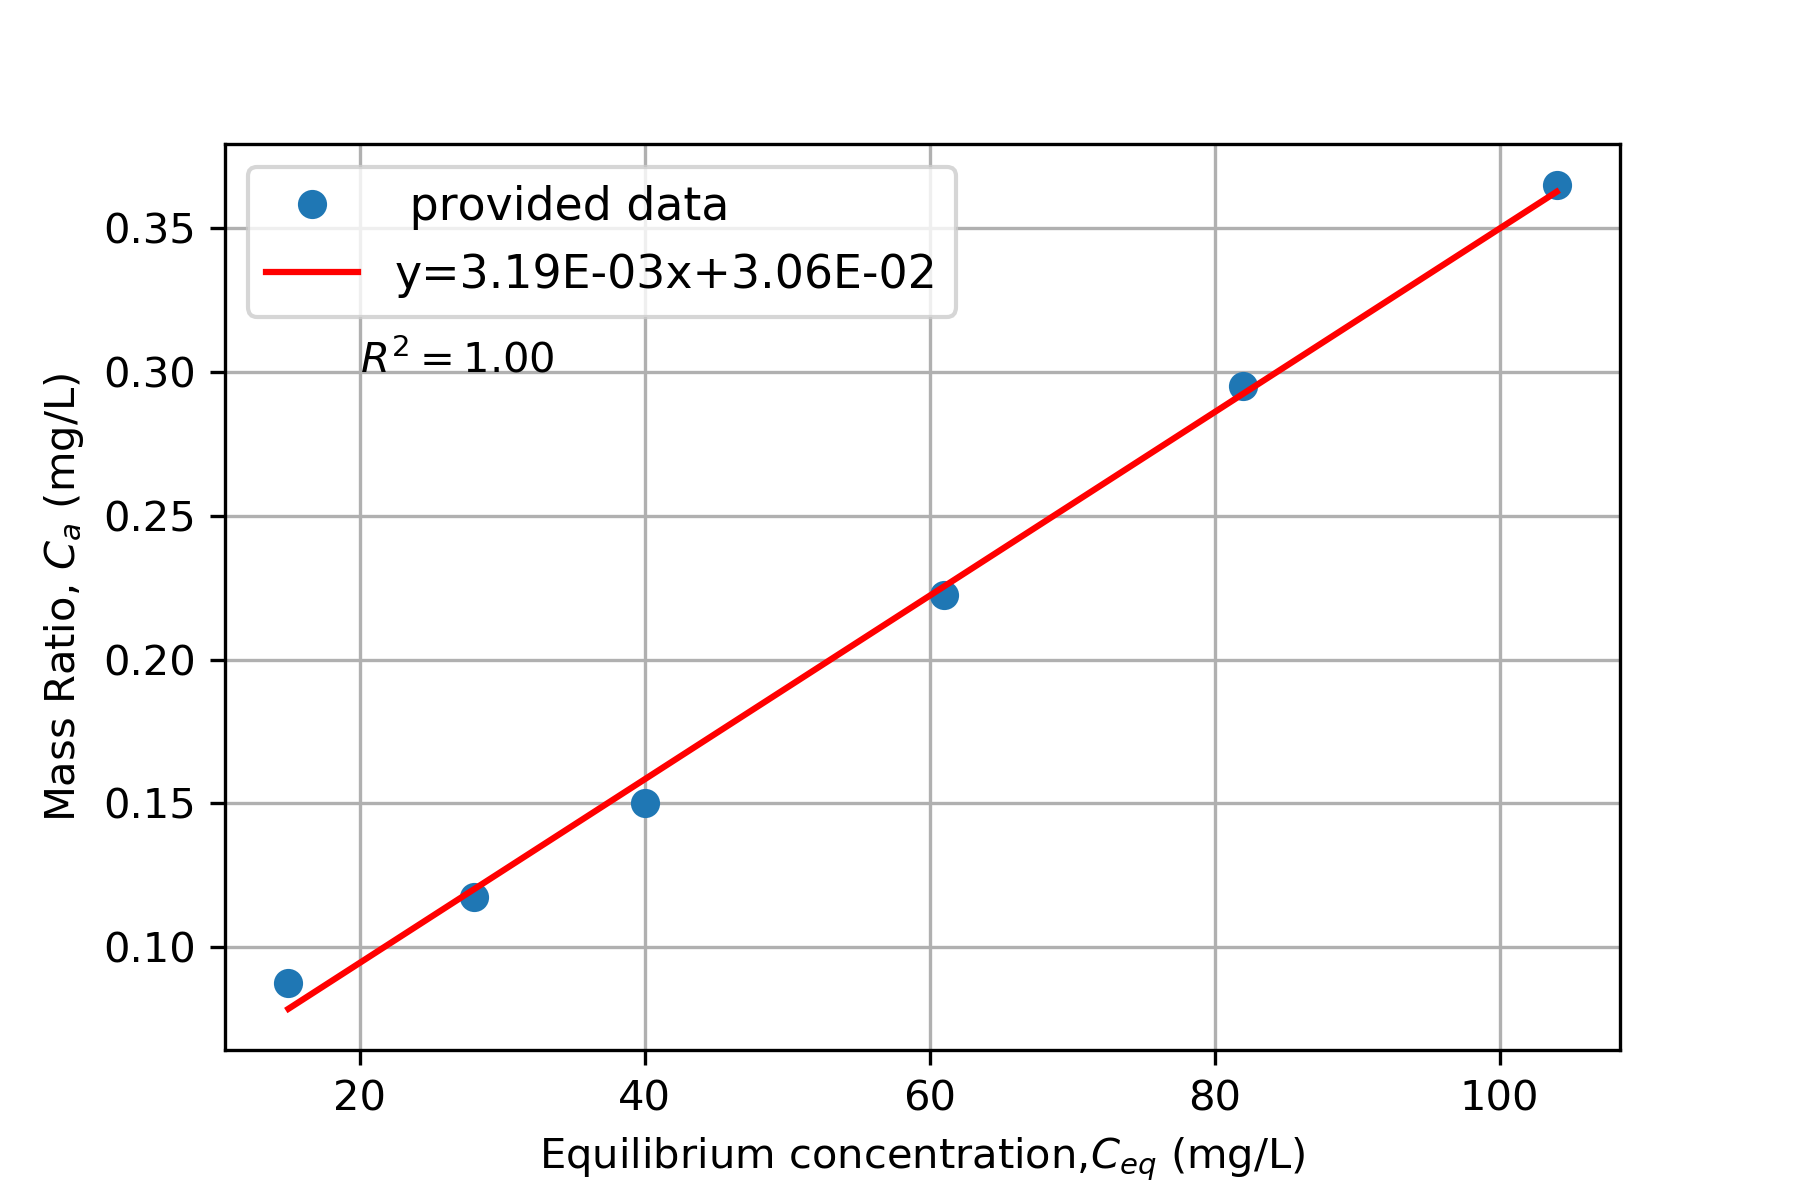

In [26]:
# Solution problem 24b
r5_7 = pn.pane.Markdown("""
### Solution Problem 24 b.
<br>
The linear isotherm is the regression line through the origin of the _C<sub>a</sub>_ vs._C<sub>eq</sub>_ plot.
Its slope is the distribution coefficient _K<sub>d</sub>_<br><br>
***Here:***<br><br>
K<sub>d</sub> = 3.19E-03 L/ g<br><br>
K<sub>d</sub> = 3.19 cm<sup>3</sup>/ g
""",width = 400, style={'font-size': '13pt'})

# Linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(d24_Ceq, d24_Ca) # linear regression

#output
fig = plt.figure()
plt.plot(d24_Ceq, d24_Ca, 'o', label=' provided data');
pred = intercept + slope*d24_Ceq # fit line
plt.plot(d16_Ceq, pred, 'r', label='y={:.2E}x+{:.2E}'.format(slope,intercept)) ;
plt.xlabel(r"Equilibrium concentration,$C_{eq} $ (mg/L)"); plt.ylabel(r"Mass Ratio, $C_{a} $ (mg/L)");
plt.grid(); plt.legend(fontsize=11);  plt.text(20, 0.30,'$R^2 = %0.2f$' % r_value)
plt.close() # otherwise we have 2 figure
r5_8 = pn.pane.Matplotlib(fig, dpi=300)

pn.Row(r5_7, r5_8) 


In [27]:
# Solution problem 24c
r5_9 = pn.pane.Markdown("""
### Solution Problem 15 c.
""",width = 400, style={'font-size': '13pt'})

r5_10 = pn.pane.LaTeX(r"""
$$ R = 1+ \frac{1-n_e}{n_e}\cdot \rho\cdot K_d $$
""",width = 400, style={'font-size': '13pt'})
pn.Column(r5_9, r5_10)

Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=400)
    [1] LaTeX(str, style={'font-size': '13pt'}, width=400)

In [28]:
#Given
rho = 2.7 # g/cm3 solid density
n_e = 0.30 # (), effective porosity
K_d = slope*1000 # cm^3/g, the slope of the plot, *1000 for unit conversion

# Calculate
R = 1 + ((1-n_e)/n_e)*rho*K_d 

#output
print("The Retardation factor of the sample is: {0:1.2f}".format(R))

The Retardation factor of the sample is: 21.11


In [15]:
#Tutorial Problem 25
r6_1 = pn.pane.Markdown("""

## Tutorial Problem 25 ##
NaCl is used to conduct a conservative tracer test in a Darcy column (length: 85 cm, diameter: 7.5 cm). 
The volumetric flow rate is 10 mL/min and the NaCl is continuously injected (concentration: 55 mg/L). 
The table shows NaCl concentrations measured at the column outlet at different times.

""",width = 600, style={'font-size': '13pt'})

r6_2 = pn.pane.LaTeX(r"""
a) Normalise outlet concentration with injection concentration.<br>
b) Plot normalized concentration as a function of time.<br>
c) Determine graphically $t_{16}$, $t_{50}$, and $t_{84}$, where $t_x$ denotes the time when $x$% of the 
injection concentration is reached at the column outlet.<br>
d) Determine effective porosity via $ n_e = \frac{Q\cdot t_{50}}{V}$ <br>                                                                     
with $V$ = total volume of the column.<br>
e) Determine dispersivity via $\alpha = \frac{L}{8}\cdot \bigg(\frac{t_{84}-t_{16}}{t_{50}}\bigg)$

""",width = 600, style={'font-size': '13pt'})


d25_t = np.array([15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180])
d25_C =  np.array([0, 0, 0, 2.5, 5.4, 10.6, 21.0, 29.1, 40.8, 51.7, 55.0, 55.0])

d25 = {"Time [min]":d25_t, "Conc. [mg/L]":d25_C}

df25 = pd.DataFrame(d25)

spacer = pn.Spacer(width=50)

r6_3= pn.Column(r6_1, r6_2 )
pn.Row(r6_3, spacer, df25)





Row
    [0] Column
        [0] Markdown(str, style={'font-size': '13pt'}, width=600)
        [1] LaTeX(str, style={'font-size': '13pt'}, width=600)
    [1] Spacer(width=50)
    [2] DataFrame(DataFrame, classes=['panel-df'])

In [18]:
r6_4 = pn.pane.Markdown("""
## Solution Problem 25 a. 
(**Check Lecture 08, Slides 21--25 for more information**)

""",width = 600, style={'font-size': '13pt'})

#Given
C_m = 55 # mg/L, injected concentration

# calculation
d25_rc = d25_C/C_m # (-), Relative conc. Conc Out/Injected Con 

#output
d25_a = d25 = {"Time [min]":d17_t, "Conc. [mg/L]":d17_C, "Rel. Conc [-]":d25_rc}
df25_a = pd.DataFrame(d17_a)
pn.Column(r6_4, df25_a) 

Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=600)
    [1] DataFrame(DataFrame, classes=['panel-df'])

Row
    [0] Markdown(str, style={'font-size': '13pt'}, width=300)
    [1] Matplotlib(Figure, dpi=300)
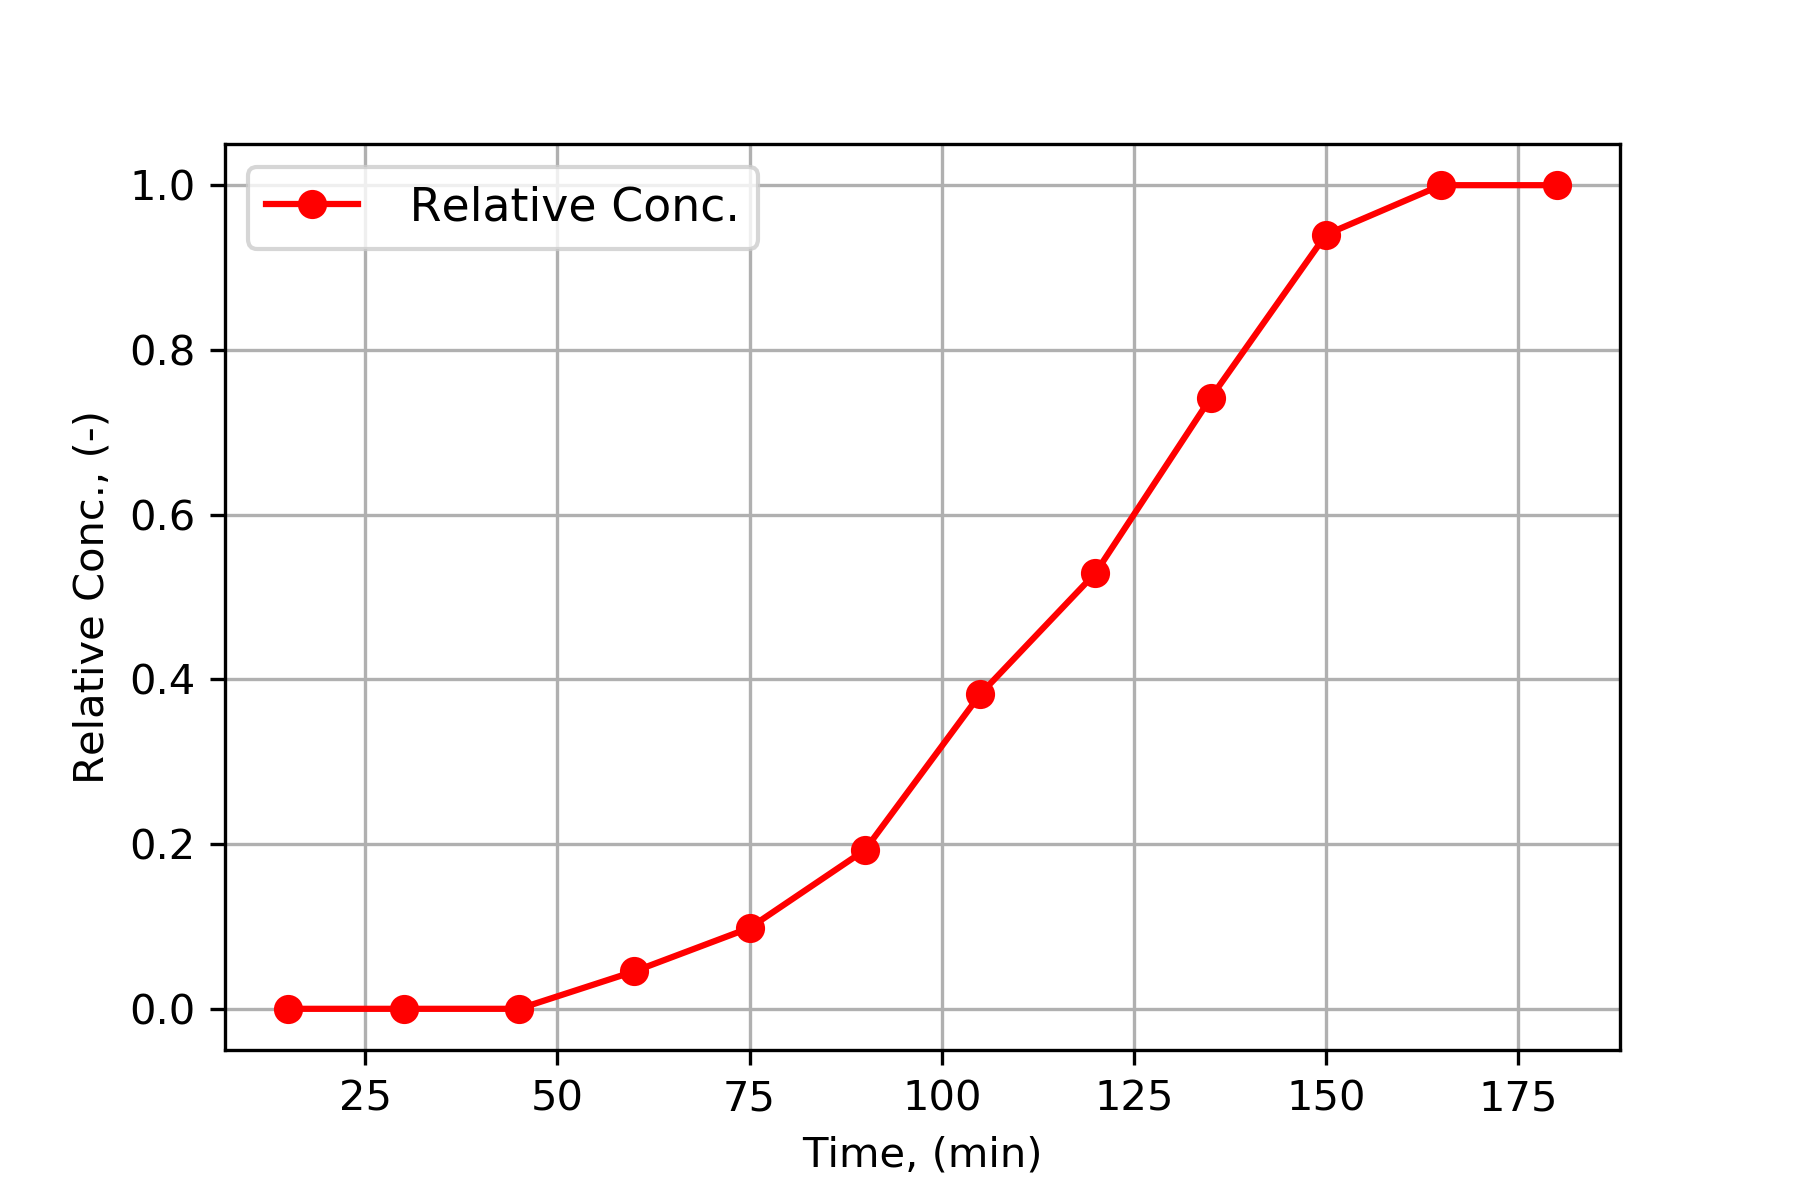

In [19]:
# Solution 25 b
r6_5 = pn.pane.Markdown("""  Solution Problem 25 b. 
""",width = 300, style={'font-size': '13pt'})

# Plotting
fig = plt.figure()
plt.plot(d25_t, d25_rc, 'o-', color = "r", label=' Relative Conc.');
plt.xlabel(r"Time, (min)"); plt.ylabel(r"Relative Conc., (-)");
plt.grid(); plt.legend(fontsize=11); 
plt.close() # otherwise we have 2 figure
r6_6 = pn.pane.Matplotlib(fig, dpi=300)

# Output
pn.Row(r6_5, r6_6) 

Row
    [0] Column
        [0] Markdown(str, style={'font-size': '13pt'}, width=300)
        [1] LaTeX(str, style={'font-size': '13pt'}, width=300)
    [1] Matplotlib(Figure, dpi=300)
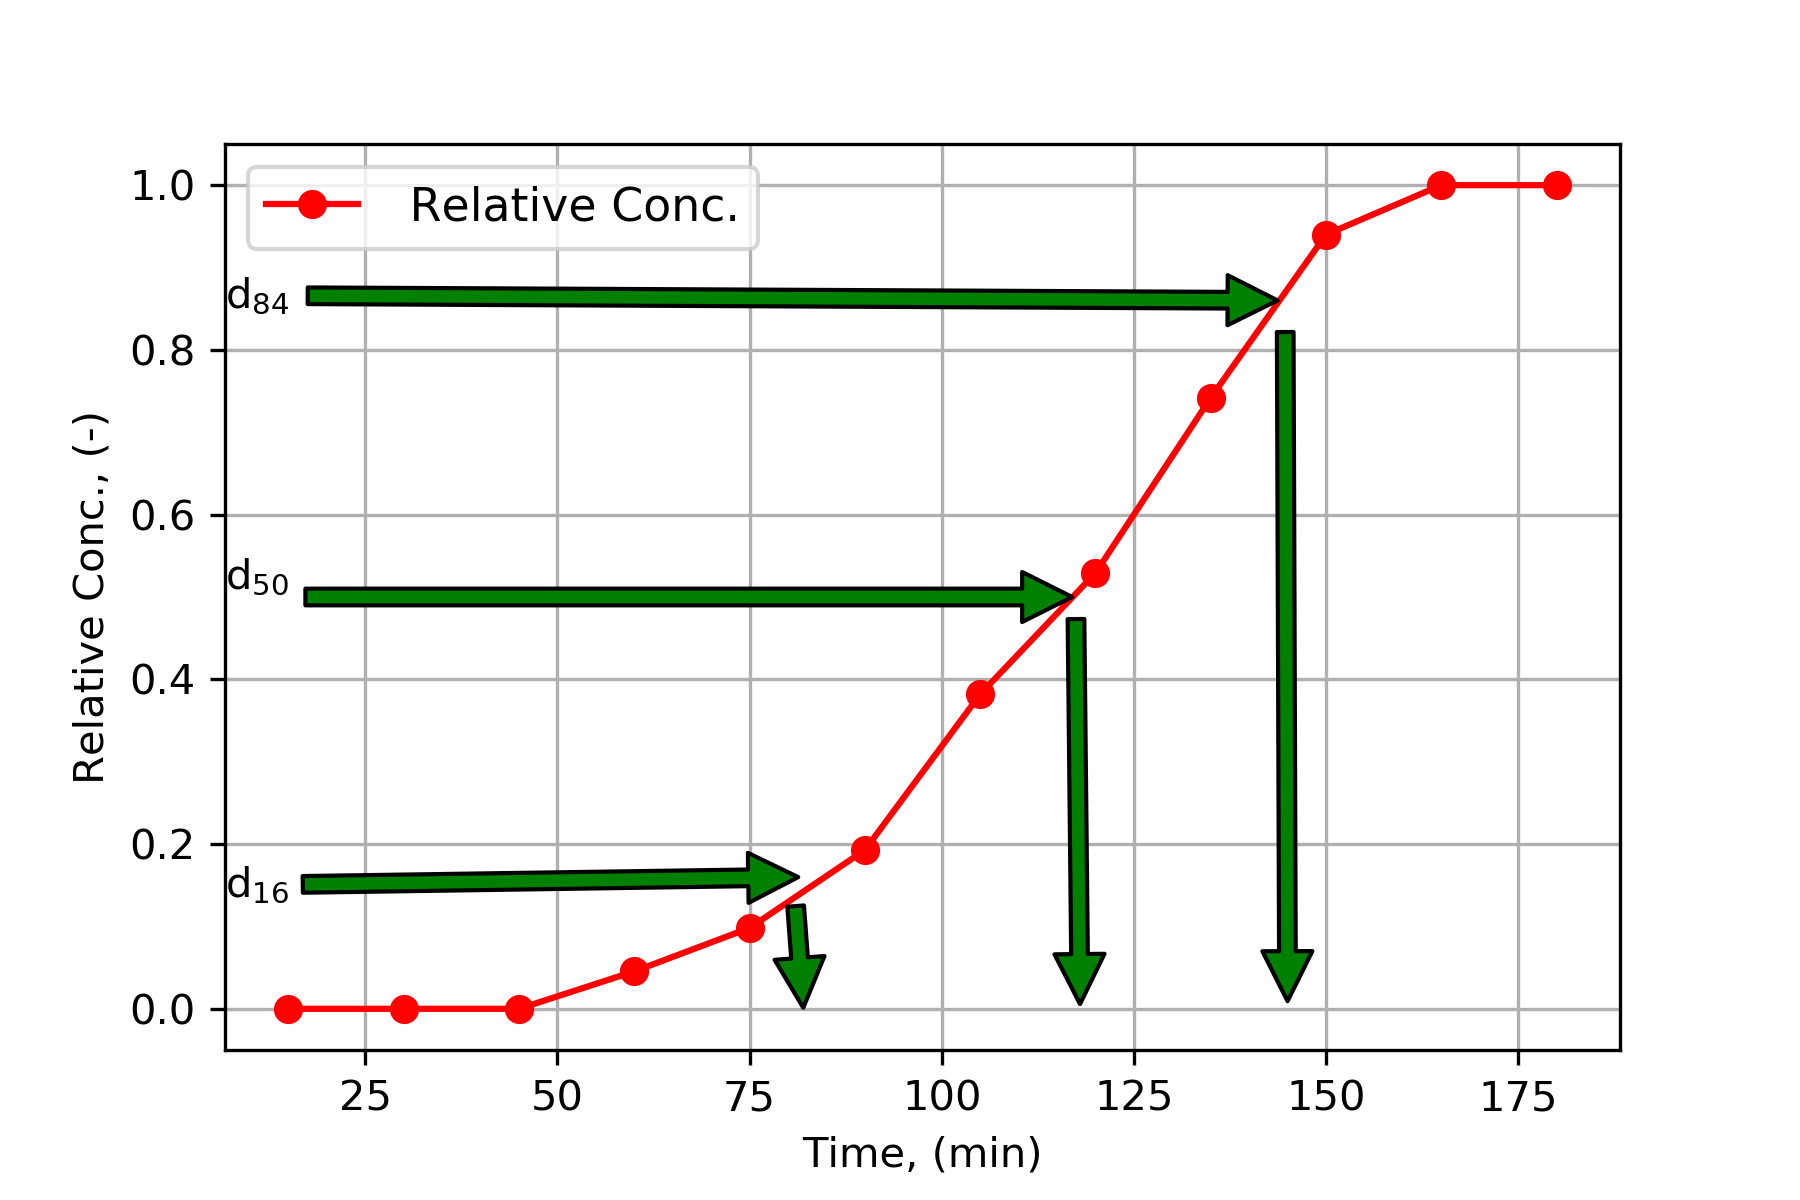

In [20]:
#Solution 25 c
r6_7 = pn.pane.Markdown("""Solution Problem 25 c. """,width = 300, style={'font-size': '13pt'})

fig = plt.figure()
plt.plot(d25_t, d25_rc, 'o-', color = "r", label=' Relative Conc.');
plt.xlabel(r"Time, (min)"); plt.ylabel(r"Relative Conc., (-)");
plt.grid(); plt.legend(fontsize=11); 
plt.annotate(r'd$_{16}$', xy=(82, 0.16),  xycoords='data',xytext=(0.0001, 0.16), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate('', xy=(82, 0.0),  xycoords='data',xytext=(0.409, 0.16), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate(r'd$_{50}$', xy=(118, 0.5),  xycoords='data',xytext=(0.0001, 0.5), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate('', xy=(118, 0.001),  xycoords='data',xytext=(0.61, 0.48), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate(r'd$_{84}$', xy=(145, 0.86),  xycoords='data',xytext=(0.0001, 0.81), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.annotate('', xy=(145, 0.001),  xycoords='data',xytext=(0.76, 0.80), textcoords='axes fraction', 
             arrowprops=dict(facecolor='green', shrink=0.01),horizontalalignment='left', verticalalignment='bottom',)
plt.close() # otherwise we have 2 figure
r6_8 = pn.pane.Matplotlib(fig, dpi=300)

r6_9 = pn.pane.LaTeX(r""" 
From the figure:<br>
$t_{16}\approx 80$<br>
$t_{50}\approx 120$<br>
$t_{84}\approx 145$<br>
                     
""",width = 300, style={'font-size': '13pt'})

r6_10 = pn.Column(r6_7, r6_9)

pn.Row(r6_10, r6_8) 

In [21]:
#Solution 25 d 

#Given
Q = 10 # mL/min, discharge in column
dc = 7.5 # cm, diameter of column
Lc = 85 # cm, length of column
t_50 = 120 # min, obtained from 17c

# Calculation
Vc = np.pi*(dc/2)**2*Lc # cm^3, Volume of column pi*d^2/4* h-
n_ef = Q*t_50/Vc # (-), effective porosity from given formula

#output
print("The effective porosity in the column is {0:1.2f}".format(n_ef))


The effective porosity in the column is 0.32


In [13]:
#Solution 25 e

#Given
t_16 = 80 # min, obtained from 17c
t_84 = 145 # min, obtained from 17c
Lc = 85 # cm, length of column

# Calculation
alpha = Lc/8*((t_84-t_16)/t_50)**2 

#output
print("The required dispersivity in the column is {0:1.2f}".format(alpha))

The required dispersivity in the column is 3.12


Text(4.2, 4.5, 't = 5 a')

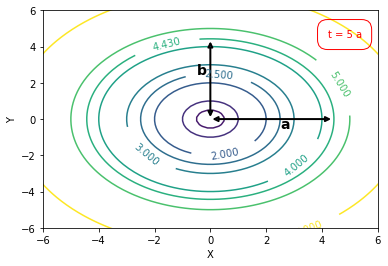

In [14]:
# contour plot code

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10.0, 10.0, 100)
y = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(np.square(X) + np.square(Y))

levels = [0.0, 0.5, 1.0, 2.0, 2.5, 3.0, 4.0, 4.43, 5, 7.0]
cp = plt.contour(X, Y, Z, levels)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X');plt.ylabel('Y')
plt.xlim([-6, 6]); plt.ylim([-6, 6]); 
plt.annotate("",xy=(0.0, 0.0), xycoords='data', xytext=(0.0, 4.4), textcoords='data',
arrowprops=dict(arrowstyle="<|-|>",lw=2,  connectionstyle="arc3"))
plt.annotate("",xy=(0.0, 0.0), xycoords='data', xytext=(4.4, 0), textcoords='data',
arrowprops=dict(arrowstyle="<|-|>", lw=2, connectionstyle="arc3"),)
plt.text(-0.5, 2.5, "b", fontweight="bold", fontsize= 14); plt.text(2.5, -0.5, "a", fontweight="bold", fontsize= 14); 
plt.text(4.2, 4.5, 't = 5 a', color='red', bbox=dict(facecolor='none', edgecolor='red', boxstyle='round,pad=1'))


Row
    [0] Column
        [0] Markdown(str, style={'font-size': '13pt'}, width=600)
        [1] LaTeX(str, style={'font-size': '13pt'}, width=600)
        [2] LaTeX(str, style={'font-size': '13pt'}, width=600)
    [1] PNG(str, width=380)
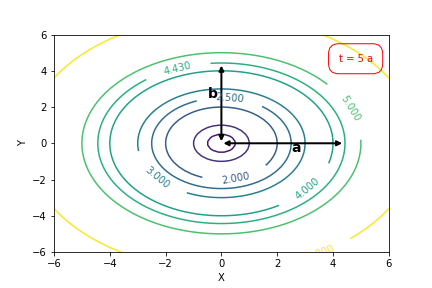

In [15]:
#Problem 26

r7_1 = pn.pane.Markdown("""## Tutorial Problem 26 """,width = 600, style={'font-size': '13pt'})

r7_2 = pn.pane.LaTeX(r"""
A conservative tracer experiment was performed under following conditions:<br>

i) steady uniform flow in an aquifer with thickness $m = 10$ m and effective porosity $n_e = 0.2$<br>
ii) linear velocity: $v_x = 2\cdot 10^{-5}$ m/s, $v_y = 0$<br>
iii) dispersivities $\alpha_L = 0.5$ m, $\alpha_T = 0.2$ m<br>
iv) At $t = 0$, a tracer mass of $M = 985$ kg was injected at $(x_0, y_0) = (0, 250)$ m.<br>
v) The tracer is not subject to sorption or degradation, i.e., $R = 1$, $\lambda = 0$.
""",width = 600, style={'font-size': '13pt'})

r7_3 = pn.pane.LaTeX(r"""
<strong>Questions:</strong> <br>
a) Where is the centre of the tracer mass after a period of $t = 5$ a?
<br>
b) Where is the concentration isoline $C^\ast = 4.43$ mg/L at that time?
(Hint: Follow instructions given on next page to solve a) and b)).
.
""",width = 600, style={'font-size': '13pt'})

r7_4 = pn.pane.PNG("images/T05_3a.png", width=380)

r7_5 = pn.Column(r7_1, r7_2, r7_3)
pn.Row(r7_5, r7_4)

Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=800)
    [1] PNG(str, width=600)
    [2] LaTeX(str, style={'font-size': '13pt'}, width=800)
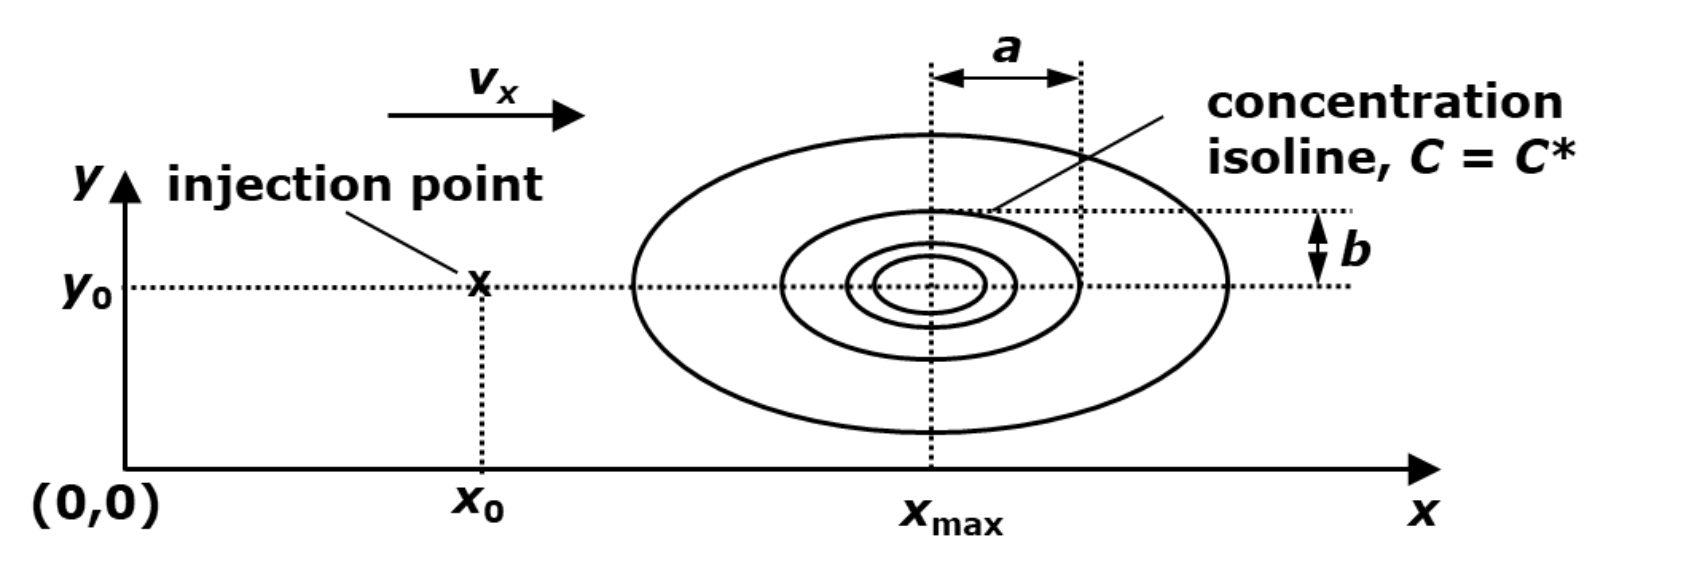

In [30]:
# Solution of Problem 26
r7_6 = pn.pane.Markdown(""" 
## Solution of Problem 26 
(**Check Lecture 08, Slides 21--25 for more information**)
""",width = 800, style={'font-size': '13pt'})

r7_7 = pn.pane.PNG("images/T05_3b.png", width=600)

r7_8 = pn.pane.LaTeX(r""" 
<br>
Concentration isolines are elliptic in the given scenario. 
Four steps are to be performed to answer problems a) and b):<br>
<br>
<strong>Step 1:</strong> Find centre of ellipse given by $x_{max} = x_0 + v_x \cdot t/R$ and $y_{max} = y_0$<br><br>
<strong>Step 2:</strong> Find peak concentration 
$ C_{max} = \frac{M}{4\cdot pi \cdot n_e \cdot m \sqrt{\alpha_L \cdot \alpha_T\cdot v_x \cdot t} }
\cdot e^{-\lambda\cdot t/R}$<br><br>
<strong>Step 3:</strong>: Calculate concentration ratio $f = C^\ast\times/C_{max}$<br><br>
<strong>Step 4:</strong> Determine lengths of semi-axes
$a = \sqrt{-4 \cdot \ln f \cdot \alpha_L \cdot v_x \cdot t/R}$ and 
$b = \sqrt{\alpha_T/\alpha_L}\cdot a $

""",width = 800, style={'font-size': '13pt'})
pn.Column(r7_6, r7_7, r7_8)

In [17]:
# Solution of Problem 26, STEP 1
#Given
x_o = 0 # m, starting point along x-direction
y_o = 250 # m, starting point along y-direction
v_x = 2*1e-5 # m/s Groundwater velocity
t = 5 # a, time in year
R = 1# (-), retardation factor

#calculate
t_s = t*365*24*3600 # s, time unit conversion
x_max = x_o + v_x*t_s/R
y_max = y_o

#output
print("The x_max is located at:{0:1.2f}".format(x_max), "m \n" )
print("The y_max is located at:{0:1.2f}".format(y_max), "m" )


The x_max is located at:3153.60 m 

The y_max is located at:250.00 m


In [18]:
# Solution of Problem 26, STEP 2
# Given 
M = 985 # kg, mass 
n_ef = 0.2 # (-), effective porosity
m = 10 # m, aquifer thickness
a_L = 0.5 # m, longitudinal dispersivity 
a_T = 0.2 # m, Transverse dispersivity
L_a = 0 #  (-), degradation rate, Lambda

# Compute
C_max = M/(4*np.pi* n_ef*m* np.sqrt(a_L*a_T)*v_x*t_s)*np.exp(-0*t_s/R)

print("The C_max is: {0:1.2e}".format( C_max), "Kg/m\u00b3 \n" ) 
print("The C_max is: {0:1.2f}".format(C_max*1000), "mg/L" ) 

The C_max is: 3.93e-02 Kg/m³ 

The C_max is: 39.30 mg/L


In [19]:
# Solution of Problem 26, STEP 3 and Step 4

#Given
C_ast = 4.43 # mg/L concentration whose location is to be found
C_maxf = C_max*1000 # mg/L converting unit of C_max from Kg/m to mg/L 

# Compute f
f = C_ast/C_maxf

# Solution Step 4

# compute a and b
a = np.sqrt(-4*np.log(f)*a_L*v_x*t_s/R)
b = np.sqrt(a_T/a_L)*a 

#Output
print("The f is: {0:1.4f}".format(f) ) 
print("The a is: {0:1.2f}".format(a), "m") 
print("The b is: {0:1.2f}".format(b), "m") 

The f is: 0.1127
The a is: 117.33 m
The b is: 74.21 m


# HOME WORK PROBLEMS #


**Sorption and Degradation**

_There is no obligation to solve homework problems!_

In [20]:
# Homework Problem 10
r8_1 = pn.pane.Markdown("""
## Homework Problem 10: 


The same series of batch experiments as in tutorial problem 16 are considered. However, experimental findings are now to be evaluated 
by assuming a Freundlich isotherm.

<br>
1. Plot decadic logarithm of mass ratio _C<sub>a</sub>_ vs. decadic logarithm of equilibrium concentration _C<sub>eq</sub>_ in a diagram.

<br>
2. Determine the Freundlich coefficient _K<sub>Fr</sub>_ and the Freundlich exponent _n<sub>Fr</sub>_.

""",width = 900, style={'font-size': '13pt'})
r8_1

Markdown(str, style={'font-size': '13pt'}, width=900)

Row
    [0] Column
        [0] Markdown(str, style={'font-size': '13pt'}, width=600)
        [1] LaTeX(str, style={'font-size': '13pt'}, width=600)
        [2] LaTeX(str, style={'font-size': '13pt'}, width=600)
    [1] PNG(str, width=380)
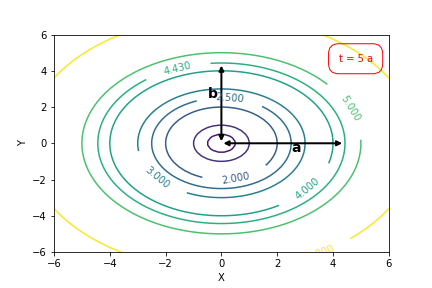

In [21]:
#Homework Problem 11

r9_1 = pn.pane.Markdown("""## Homework Problem 11 """,width = 600, style={'font-size': '13pt'})

r9_2 = pn.pane.LaTeX(r""" 
A reactive tracer experiment was performed under following conditions:<br>

i) steady uniform flow in an aquifer with thickness $m = 10$ m and effective porosity $n_e = 0.2$<br>
ii) linear velocity: $v_x = 2\cdot 10^{-5}$ m/s, $v_y = 0$<br>
iii) dispersivities $\alpha_L = 0.5$ m, $\alpha_T = 0.2$ m<br>
iv) At $t = 0$, a tracer mass of $M = 985$ kg was injected at $(x_0, y_0) = (0, 250)$ m.<br>
v) The tracer is not subject to sorption or degradation, i.e., $R = 4.75$, $\lambda = 1\, a^{-1}$.
""",width = 600, style={'font-size': '13pt'})

r9_3 = pn.pane.LaTeX(r"""
<strong>Questions:</strong> <br>
a) Where is the centre of the tracer mass after a period of $t = 5$ a?
b) Where is the concentration isoline $C^\ast = 4.43$ mg/L at that time?
.
""",width = 600, style={'font-size': '13pt'})

r9_4 = pn.pane.PNG("images/T05_3a.png", width=380)

r9_5 = pn.Column(r9_1, r9_2, r9_3)
pn.Row(r9_5, r9_4)